# Startup Data Analysis
### Case Study Part-I 
#### Part of ML Course by Coding Ninjas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
data=pd.read_csv("startup_funding.csv")

In [4]:
data.shape

(2372, 10)

In [5]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [6]:
data.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

### Number of Fundings Year Wise

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [8]:
data['Date']=data['Date'].str.replace('.','/')
data['Date']=data['Date'].str.replace('//','/')

data['Date']=pd.to_datetime(data['Date'],dayfirst=True,format="%d/%m/%Y")
data['Year']=data['Date'].dt.year

In [9]:
grp_data_year=data.groupby('Year').count()
grp_data_year['Date']

Year
2015    936
2016    993
2017    443
Name: Date, dtype: int64

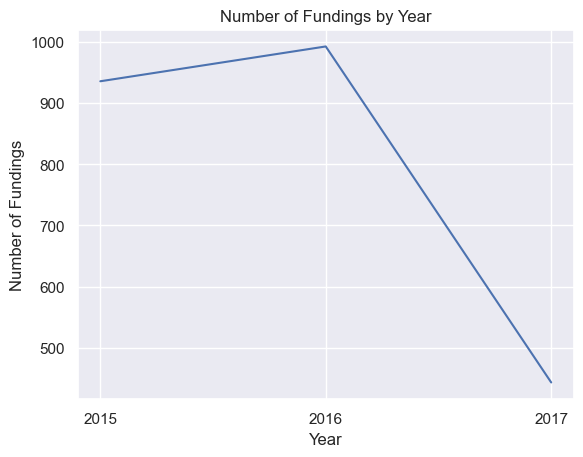

In [10]:
plt.plot(grp_data_year.index,grp_data_year['Date'])
plt.xticks([2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.title("Number of Fundings by Year")
plt.show()

### Top Cities to get Funding

In [11]:
data['CityLocation']=data['CityLocation'].str.lower()
data['CityLocation']=data['CityLocation'].str.replace(" new delhi","delhi")
data['CityLocation']=data['CityLocation'].str.replace("delhi","new delhi")
data['CityLocation']=data['CityLocation'].str.capitalize()

In [12]:
grp_data_city=data['CityLocation'].value_counts()[:10]
grp_data_city

CityLocation
Bangalore        628
Mumbai           446
New new delhi    381
Gurgaon          240
Pune              84
Noida             78
Hyderabad         76
Chennai           66
Ahmedabad         35
Jaipur            25
Name: count, dtype: int64

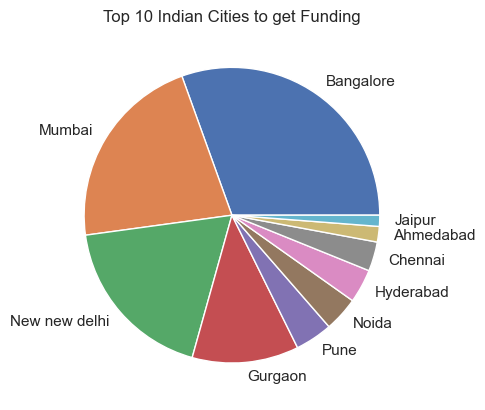

In [13]:
plt.pie(grp_data_city,labels=grp_data_city.index)
plt.title("Top 10 Indian Cities to get Funding")
plt.show()

### Investment Type Distribution

In [14]:
data['InvestmentType']=data['InvestmentType'].map({
        'Seed Funding':'Seed Funding',
'Private Equity':'Private Equity',
'SeedFunding':'Seed Funding',
'Debt Funding':"Debt Funding",
'PrivateEquity':'Private Equity',
'Crowd funding:':'Crowd Funding',
'Crowd Funding':'Crowd Funding'
})

In [15]:
grp_data_type=np.round(data['InvestmentType'].value_counts(normalize=True)*100,2)
grp_data_type=grp_data_type.iloc[[1,2,0,3]]

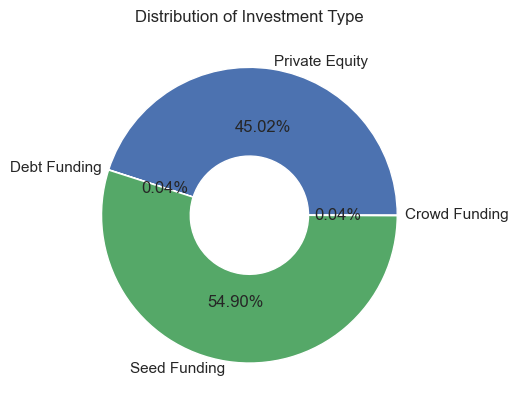

In [16]:
plt.pie(grp_data_type,labels=grp_data_type.index,labeldistance=1.05,
        wedgeprops=dict(width=0.6),autopct='%.2f%%')
plt.title("Distribution of Investment Type")
plt.show()

### Top Industries

In [17]:
data['AmountInUSD']=data['AmountInUSD'].str.replace(',','')
data['IndustryVertical']=data['IndustryVertical'].str.replace('eCommerce','ECommerce')

data['AmountInUSD']=data['AmountInUSD'].astype(float)
grp_data_industry=data[['AmountInUSD','IndustryVertical']].groupby("IndustryVertical").sum()

grp_data_industry=grp_data_industry.sort_values("AmountInUSD",ascending=False)[:10]

In [18]:
grp_data_industry.rename(columns={'AmountInUSD':"Funding in million USD"},inplace=True)
grp_data_industry=grp_data_industry/1000000
grp_data_industry

,Funding in million USD
IndustryVertical,
ECommerce,4277.109608
Consumer Internet,3797.089000
Technology,1103.593500
Online Marketplace,700.000000
E-Commerce & M-Commerce platform,680.000000
Car Aggregator & Retail Mobile App,500.000000
Ecommerce Marketplace,500.000000
Cab Aggregator,400.000000
Cab rental Mobile app,225.000000


### Top 5 Startup Names

In [19]:
grp_data_name=data[['StartupName','AmountInUSD']].groupby('StartupName').sum()['AmountInUSD']
grp_data_name.sort_values(ascending=False)[:5]

StartupName
Paytm           2.140000e+09
Flipkart        1.559700e+09
Ola             9.845000e+08
Snapdeal        7.000000e+08
Flipkart.com    7.000000e+08
Name: AmountInUSD, dtype: float64

### Top 5 Startups with Most Funding Rounds

In [20]:
grp_data_round=data[['StartupName','AmountInUSD']].groupby('StartupName').count()['AmountInUSD']
grp_data_round.sort_values(ascending=False)[:5]

StartupName
Swiggy           7
UrbanClap        5
Voonik           4
Capital Float    4
Flipkart         4
Name: AmountInUSD, dtype: int64

### Top Investor

In [21]:
grp_data_investor=data[['InvestorsName',"AmountInUSD"]].groupby("InvestorsName").count()
grp_data_investor.sort_values("AmountInUSD",ascending=False)[2:5]

,AmountInUSD
InvestorsName,
Group of Angel Investors,14
Kalaari Capital,13
Sequoia Capital,12


# Completed all tasks of the case study (Part-I) as a part of Coding Ninjas ML Course